# WeatherPy
----


#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

city_name = []
lats1 = []
lngs1 = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
dates = []
record = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities[1])


provideniya


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}"
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=84234fff1c3a20a31f245328cdff131e&units=imperial


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadhoo
Processing Record 24 of Set 1 | khatanga
Processing Record 25 of Set 1 | saint-philippe
Processing Record 26 of Set 1 | rikitea
Processing Record 27 of Set 1 | ust-kamchatsk
City not found. Skipping...

In [4]:




for city in cities:
    
    try:    
        response = requests.get(f'{query_url}&q={city}').json()
        city_name.append(response["name"])
        lats1.append(response["coord"]["lat"])
        lngs1.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        city_record = (response['name'])
        print(f'Processing Record:{record} : {city_record}')
        record += 1
    except:
        print("City not found. Skipping...")
    continue

Processing Record:1 : Qaanaaq
Processing Record:2 : Provideniya
Processing Record:3 : Asău
Processing Record:4 : Djambala
Processing Record:5 : Nemuro
Processing Record:6 : Province of Groningen
Processing Record:7 : Hong Kong
Processing Record:8 : Kaitangata
Processing Record:9 : Sapernoye
Processing Record:10 : Nanortalik
Processing Record:11 : São Filipe
Processing Record:12 : Bredasdorp
Processing Record:13 : Caravelas
Processing Record:14 : Kondinskoye
Processing Record:15 : Namatanai
Processing Record:16 : Tazovsky
Processing Record:17 : Bethel
Processing Record:18 : Kananga
Processing Record:19 : Kapaa
Processing Record:20 : Bluff
Processing Record:21 : Cidreira
City not found. Skipping...
Processing Record:22 : Dikson
City not found. Skipping...
Processing Record:23 : Sinjai
Processing Record:24 : Batagay-Alyta
Processing Record:25 : Lüderitz
Processing Record:26 : Utkivka
Processing Record:27 : Atuona
Processing Record:28 : Avarua
Processing Record:29 : Busselton
Processing Re

Processing Record:231 : Luba
Processing Record:232 : Kara-Tyube
City not found. Skipping...
Processing Record:233 : Walvis Bay
Processing Record:234 : Terme
Processing Record:235 : Ancud
Processing Record:236 : Vila Velha
City not found. Skipping...
City not found. Skipping...
Processing Record:237 : Beringovskiy
Processing Record:238 : Tiksi
Processing Record:239 : Mar del Plata
Processing Record:240 : North Bend
Processing Record:241 : Ābādān
City not found. Skipping...
Processing Record:242 : Longyearbyen
Processing Record:243 : Tena
Processing Record:244 : Tura
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record:245 : Iqaluit
Processing Record:246 : Upernavik
Processing Record:247 : Cap Malheureux
Processing Record:248 : Vostok
Processing Record:249 : Grindavik
Processing Record:250 : Hay River
Processing Record:251 : Panguna
Processing Record:252 : Ponta Delgada
Processing Record:253 : Djibouti
Processing Record:254 : Soyo
Processi

City not found. Skipping...
Processing Record:459 : Port Macquarie
Processing Record:460 : Koāth
Processing Record:461 : Laem Sing
Processing Record:462 : Stafford
Processing Record:463 : Houma
Processing Record:464 : Hamilton
Processing Record:465 : Kabale
Processing Record:466 : Teya
City not found. Skipping...
Processing Record:467 : Dunmore East
Processing Record:468 : Pangnirtung
Processing Record:469 : Ambilobe
Processing Record:470 : Kodala
Processing Record:471 : Venice
Processing Record:472 : Horsham
Processing Record:473 : Saint Anthony
Processing Record:474 : Porbandar
Processing Record:475 : Divičani
Processing Record:476 : Verkh-Suetka
Processing Record:477 : Kismayo
Processing Record:478 : San Miguel de Tucumán
Processing Record:479 : Sundumbili
Processing Record:480 : Clyde
Processing Record:481 : Naryan-Mar
Processing Record:482 : Ust'-Omchug
Processing Record:483 : Rafaela
Processing Record:484 : Nelson Bay
Processing Record:485 : Iracoubo
Processing Record:486 : Kapus

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [96]:
#Create DataFrame
weather_dict = {
    "City" : city_name, 
    "Country" : country, 
    "Lat" : lats1,
    "Lng" : lngs1,
    "Max Temp" : max_temp,
    "Humidity" : humidity, 
    "Cloudiness": cloudiness, 
    "Wind Speed": wind_speed,
    "Date": dates, 
    }
weather_data = pd.DataFrame(weather_dict)
weather_data.head(None)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Qaanaaq,GL,77.4840,-69.3632,22.28,83,100,4.63,1619213770
1,Provideniya,RU,64.3833,-173.3000,40.23,57,81,4.12,1619213805
2,Asău,RO,46.4333,26.4000,37.99,70,38,2.98,1619213866
3,Djambala,CG,-2.5447,14.7533,69.76,91,93,2.15,1619213866
4,Nemuro,JP,43.3236,145.5750,39.83,81,100,15.77,1619213837
...,...,...,...,...,...,...,...,...,...
574,Aranos,NA,-24.1333,19.1167,66.92,25,0,8.93,1619214085
575,Fremont,US,37.5483,-121.9886,66.99,55,1,12.66,1619214086
576,Kadirli,TR,37.3739,36.0961,66.00,74,93,4.79,1619214086
577,Larsnes,NO,62.2028,5.5773,35.01,85,85,1.01,1619214086


In [94]:
#Save Data to CSV
weather_data.to_csv('../output_data/WeatherData.csv', index=False)
weather_data = pd.read_csv('../output_data/WeatherData.csv').dropna()
weather_data.head(None)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Qaanaaq,GL,77.4840,-69.3632,22.28,83,100,4.63,1619213770
1,Provideniya,RU,64.3833,-173.3000,40.23,57,81,4.12,1619213805
2,Asău,RO,46.4333,26.4000,37.99,70,38,2.98,1619213866
3,Djambala,CG,-2.5447,14.7533,69.76,91,93,2.15,1619213866
4,Nemuro,JP,43.3236,145.5750,39.83,81,100,15.77,1619213837
...,...,...,...,...,...,...,...,...,...
568,Banjar,ID,-8.1900,114.9675,77.00,83,20,3.44,1619214085
569,Fremont,US,37.5483,-121.9886,66.99,55,1,12.66,1619214086
570,Kadirli,TR,37.3739,36.0961,66.00,74,93,4.79,1619214086
571,Larsnes,NO,62.2028,5.5773,35.01,85,85,1.01,1619214086


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#Only show cities with Humidity less than or equal to 100%
nohumid_data = weather_data[weather_data['Humidity'] <= 100]
difference = len(weather_data) - len(nohumid_data)
print(f'There are {difference} cities with Humidity > 100%')
nohumid_data.head(None)

There are 0 cities with Humidity > 100%


,Unnamed: 0,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,0,Qaanaaq,GL,77.4840,-69.3632,22.28,83,100,4.63,1619213770
1,1,Provideniya,RU,64.3833,-173.3000,40.23,57,81,4.12,1619213805
2,2,Asău,RO,46.4333,26.4000,37.99,70,38,2.98,1619213866
3,3,Djambala,CG,-2.5447,14.7533,69.76,91,93,2.15,1619213866
4,4,Nemuro,JP,43.3236,145.5750,39.83,81,100,15.77,1619213837
...,...,...,...,...,...,...,...,...,...,...
574,574,Aranos,NaN,-24.1333,19.1167,66.92,25,0,8.93,1619214085
575,575,Fremont,US,37.5483,-121.9886,66.99,55,1,12.66,1619214086
576,576,Kadirli,TR,37.3739,36.0961,66.00,74,93,4.79,1619214086
577,577,Larsnes,NO,62.2028,5.5773,35.01,85,85,1.01,1619214086


In [32]:
#Longer alternative method to filtering data. 
#  Get the indices of cities that have humidity over 100%.
humid_cities = weather_data[weather_data['Humidity'] > 100]
print(f'There are {len(humid_cities)} cities with Humidity > 100%')
humid_cities.head(None)
humidlist = humid_cities.index.tolist()
humlen = len(humidlist)

There are 0 cities with Humidity > 100%


In [35]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
if humlen > 0:
    clean_city_data = weather_data.drop(humidlist)
    clean_city_data.head(None)
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

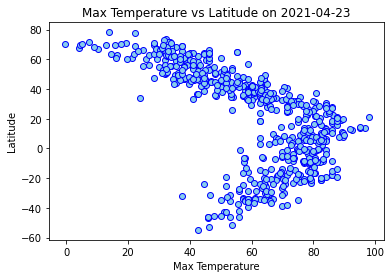

In [37]:
#Changed latitude to Y axis to better represent latitude in relation to the equator
from datetime import date
today = date.today()


plt.scatter(weather_data["Max Temp"], weather_data['Lat'], edgecolors="b", facecolors="skyblue")
plt.title(f"Max Temperature vs Latitude on {today}")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
plt.savefig("../output_data/latitude_vs_max_temp.png")
plt.show()


## Latitude vs. Humidity Plot

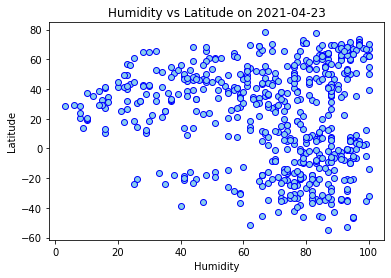

In [11]:
plt.scatter(weather_data["Humidity"], weather_data['Lat'], edgecolors="b", facecolors="skyblue")
plt.title(f"Humidity vs Latitude on {today}")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.savefig("../output_data/latitude_vs_humid.png")
plt.show()


## Latitude vs. Cloudiness Plot

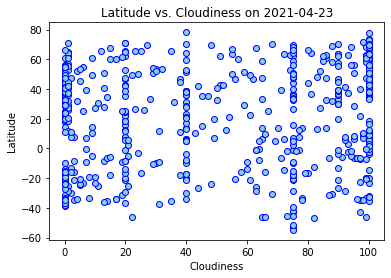

In [12]:
plt.scatter(weather_data["Cloudiness"], weather_data['Lat'], edgecolors="b", facecolors="skyblue")
plt.title(f"Latitude vs. Cloudiness on {today}")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

plt.savefig("../output_data/latitude_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

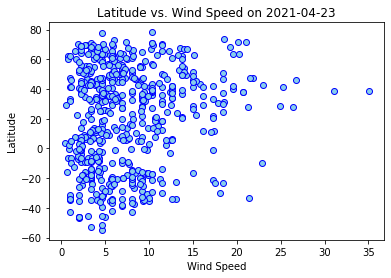

In [13]:
plt.scatter(weather_data["Wind Speed"], [weather_data['Lat']], edgecolors="b", facecolors="skyblue")
plt.title(f"Latitude vs. Wind Speed on {today}")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")

plt.savefig("../output_data/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [39]:
north_df = weather_data[weather_data['Lat'] >= 0]
south_df = weather_data[weather_data['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

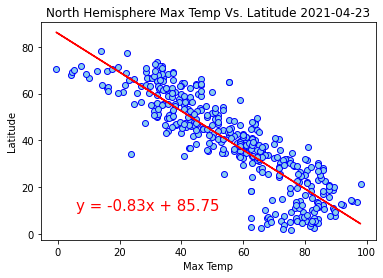

In [78]:
x_values = north_df["Max Temp"]
y_values = north_df['Lat']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="b", facecolors="skyblue" )
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.title(f"North Hemisphere Max Temp Vs. Latitude {today}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

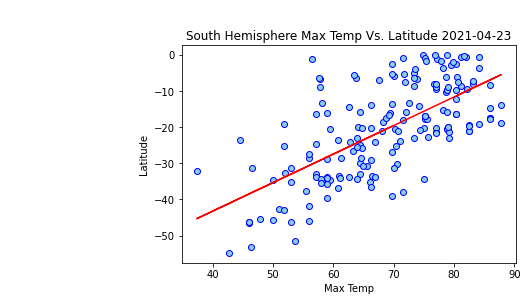

In [76]:
x_values = south_df["Max Temp"]
y_values = south_df['Lat']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="b", facecolors="skyblue" )
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.title(f"South Hemisphere Max Temp Vs. Latitude {today}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

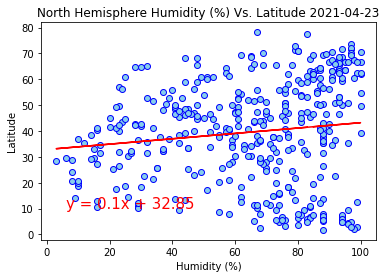

In [75]:
x_values = north_df["Humidity"]
y_values = north_df['Lat']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="b", facecolors="skyblue" )
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title(f"North Hemisphere Humidity (%) Vs. Latitude {today}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

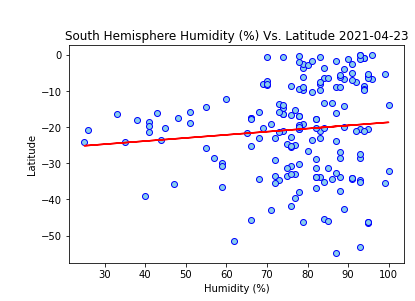

In [74]:
x_values = south_df["Humidity"]
y_values = south_df['Lat']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="b", facecolors="skyblue" )
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title(f"South Hemisphere Humidity (%) Vs. Latitude {today}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

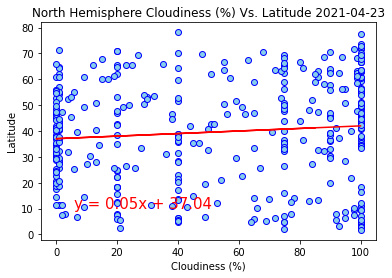

In [73]:
x_values = north_df["Cloudiness"]
y_values = north_df['Lat']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="b", facecolors="skyblue" )
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title(f"North Hemisphere Cloudiness (%) Vs. Latitude {today}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

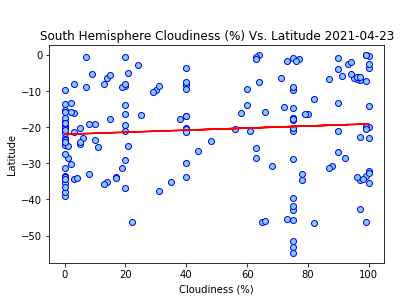

In [72]:
x_values = south_df["Cloudiness"]
y_values = south_df['Lat']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="b", facecolors="skyblue" )
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title(f"South Hemisphere Cloudiness (%) Vs. Latitude {today}")
plt.show()

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

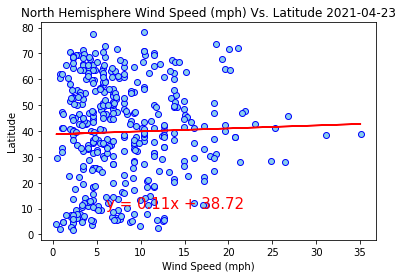

In [70]:
x_values = north_df["Wind Speed"]
y_values = north_df['Lat']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="b", facecolors="skyblue" )
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title(f"North Hemisphere Wind Speed (mph) Vs. Latitude {today}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

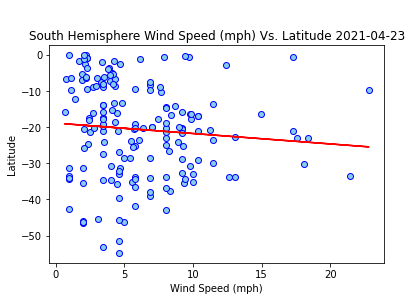

In [71]:
x_values = south_df["Wind Speed"]
y_values = south_df['Lat']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="b", facecolors="skyblue" )
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title(f"South Hemisphere Wind Speed (mph) Vs. Latitude {today}")
plt.show()